## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Part IV - Final Conclusion](#final)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# imports

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load CSV File
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Get the number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# Get que number of unique users on dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# proportion of all dataset
print(df.converted.mean())

# proportion of uniquee users converted
print(df.drop_duplicates(subset='user_id').converted.mean())

0.11965919355605512
0.1195695564793657


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# The control group that receives the new page
op1 = df.query('group != "treatment" and landing_page == "new_page"').shape[0]

In [7]:
# The treatment group that receives the old page
op2 = df.query('group == "treatment" and landing_page != "new_page"').shape[0]

In [8]:
op1 + op2

3893

f. Do any of the rows have missing values?

In [9]:
# Verify if there is some null value and sum all rows per columns
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Cond 1 = It's on control group and receives the old page
# Cond 2 = It's on treatment group and receives the new page

cond1 = (df.group == 'control') & (df.landing_page == 'old_page')
cond2 = (df.group == 'treatment') & (df.landing_page == 'new_page')

In [11]:
# Query the Data set filtering by the Cond 1 and 2
df2 = df[cond1 | cond2].copy()

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
# Numbebr of unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# Verify if the number of unique users it's the same of number of rows on the dataset
df2.user_id.shape[0] == df2.user_id.nunique()

False

c. What is the row information for the repeat **user_id**? 

In [15]:
# Get the row where user id is duplicated
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Droping the duplicated row by the subset
df2.drop_duplicates(subset='user_id', inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# The probability of an individual convert on the all dataset
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# The probability of an individual convert when in control group
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# The probability of an individual convert when in treatment group
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

In [20]:
obs_diff = df2[df2.group == 'treatment'].converted.mean() - df2[df2.group == 'control'].converted.mean()
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [21]:
# Checking the probability of someone receive the new page on this experiment
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [22]:
df2.landing_page.value_counts(normalize=True).round(2)

new_page    0.5
old_page    0.5
Name: landing_page, dtype: float64

In [23]:
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

**Your answer goes here.**

>Following the above steps and with the evidences of so far, I don't feel enough confidence. 
>
>For now, I know that in this experiment, the new landing page doesn't looks like leads to more conversions, since the rate of conversion got lower on the treatment group. And the amount of people in each group is almost the same, so the probability of a person receiving the new page it's almost the same of receiving the old one. Until now, apear to be a experiment with fair odds.
>
>_But_, I didn't check the period of the experiment. And in the treatment group, I don't know if the users are new users only or if there is old users. If so, and the experiment doesn't went for enought time, maybe the  user could be experiencing change aversion.
>
>However, how on this data doesn't has the information of where each group (old users or new users) the user fits and the information was not passed before, I will assume that all the users are new users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<math>
    \[ H_0: p_{new} - p_{old} \leq 0\]
    \[ H_1: p_{new} - p_{old} > 0\]
</math>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
# Considering the null, both probabilities are the same, so using the probability of all dataset for both
pnew_null = df2.converted.mean()
pnew_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
pold_null = df2.converted.mean()
pold_null

0.11959708724499628

In [26]:
pnew_null - pold_null

0.0

c. What is $n_{new}$?

In [27]:
# Number of rows that receive the new page
nnew = df2[df2.landing_page == 'new_page'].shape[0]
nnew

145310

d. What is $n_{old}$?

In [28]:
# Number of rows that receive the old page
nold = df2[df2.landing_page == 'old_page'].shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# Generating new transactions considering the pnew under the null
new_page_converted = np.random.binomial(1, pnew_null, nnew)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
# Generating new transactions considering the pold under the null
old_page_converted = np.random.binomial(1, pold_null, nold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
pnew_converted = new_page_converted.mean()
pold_converted = old_page_converted.mean()
pnew_converted - pold_converted

-0.0018189976112543138

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
# Generating 10,000 differences of p-values 

# p_diffs = []

# for _ in range(10000):
#     new_mean = np.random.binomial(1, pnew_null, nnew).mean()
#     old_mean = np.random.binomial(1, pold_null, nold).mean()
#     p_diffs.append(new_mean - old_mean)


# Using the suggestion 
'''
(I knew that using numpy it's faster, 
but I didn't find how to use correctly to get the same results...
Thanks for the tip :) )
'''

new_converted_simulation = np.random.binomial(nnew, pnew_null, 10000)/nnew
old_converted_simulation = np.random.binomial(nold, pold_null, 10000)/nold

p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

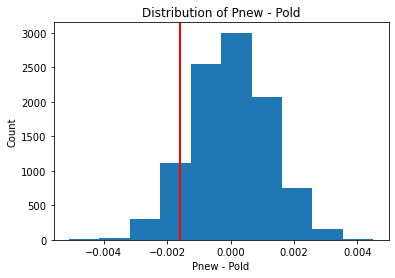

In [33]:
# Plotting the histogram

plt.hist(p_diffs)
plt.axvline(obs_diff, color='r', linewidth=2)
plt.title('Distribution of Pnew - Pold')
plt.xlabel('Pnew - Pold')
plt.ylabel('Count')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
# Getting the proportion that are greater than the actual difference
(np.array(p_diffs) > obs_diff).mean()

0.9052

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

>It was calculated the p-value and this is the probability of observing the choosed statistic (or one more extreme in favor of the alternative) if the null hypothesis is true. 
>
>In this case, considering the Type I error rate of 5% (0.05), we fail in reject the null hypothesis, since our p-value of 0.9056 (90.6%) are greater then the Type I error error permited.
>
>So, with all evidences until now, keep with the old page would be a better strategy until think on new ways to improve the conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
#Importing
import statsmodels.api as sm

# Setting the variables to use the built-in function
old_page = df2.query('landing_page == "old_page"')
new_page = df2.query('landing_page == "new_page"')

convert_old = sum(old_page.converted == 1)
convert_new = sum(new_page.converted == 1)
n_old = old_page.shape[0]
n_new = new_page.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
# Calculating the p-value and z-score
count = [convert_new, convert_old]
nobs = [n_old, n_new]
z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative='larger')

In [37]:
z_score, p_value

(-1.2616957421858055, 0.8964708551967226)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

>The number found on the built-in agree with the previous findings. So, we still fail in reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

>Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
# Getting the dummies variable and creating the intercept
df2['ab_page'] = pd.get_dummies(df2.group, drop_first=True)
df2['intercept'] = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
# Instantiate the model and fitting
model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
# Showing the results
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-09-29 14:14 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

<math>
    \[ H_0: p_{new} - p_{old} = 0 \]
    \[ H_1: p_{new} - p_{old} \neq 0 \]
</math>

>In this way, the p-value associated with ab_page it's only informing if there is some difference associated with the new page or not. So, in this case it's aggregated the hyphoteses:

<math>
    \[ p_{new} < p_{old} \]
    \[ p_{new} > p_{old} \]
</math>

>On other words (as suggested) the difference between p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

>How a regression model it's a machine learning technique, and the objective it's try to predict if somoeone will be converted or not, more relevant and correlated features would, probably, make some increases on the scores. 
>
>Can be disadvantages if only add any feature on the model without studying if it makes sense.  

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
# Loading the countries CSV File and Merging with the previous dataset
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
# Checking the new dataset
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [43]:
### Create the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new.country, drop_first=True)

In [44]:
# Fitting the model and checking the information
model = sm.Logit(df_new.converted, df_new[['intercept', 'UK', 'US']])
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-09-29 14:14 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# Interacting the variables
'''
(I thought that would be necessary, but was not sure. 
I didn't do before because I was running out time to deliver :) )
'''

df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']

In [46]:
# Fitting the model and checking the information
model = sm.Logit(df_new.converted, df_new[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
res = model.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-09-29 14:14 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [47]:
# Getting the exponencial values
np.exp(res.params)

intercept     0.134794
ab_page       0.934776
UK            1.011854
US            1.017682
UK_ab_page    1.081428
US_ab_page    1.048001
dtype: float64

In [48]:
# Getting the exponencial inverse value, since the ab_page has a coefficient lower than 0
1/np.exp(res.params['ab_page'])

1.0697747746096118

>The $R^2$ as 0 show us that it's not a good model. Also, with the p-values we still fail on reject the null, considering the 0.05 Type I error. 
>
>Considering the ab_page, when the user receives the new_page, the chances of being converted it's 1 times lower than if receives the old_page.
>
>Now, considering the UK and US coeficients, the chances of being converted it's 1 times higher than if the person it's on CA.
>
>And considering the UK_ab_page and US_ab_page, there is 1 time higher chances of someone in this places be converted than in CA. 

<a id='final'></a>
### Part IV - Final Conclusion

>After all the evidences in each step of the Analysis, we can affirm that we fail on reject the null hypothesis. And on this way, the is the best page to follow on it's the old page.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.